# Título proyecto

Descripción

## 1. Importación de librerías requeridas

In [36]:
## !pip install opencv-python
!pip install matplotlib
## !pip install pillow
!pip install sklearn
!pip install sklearn-extra

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: Could not find a version that satisfies the requirement sklearn-extra (from versions: none)
ERROR: No matching distribution found for sklearn-extra


In [37]:
# Librerias
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
#import time
from PIL import Image
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#from sklearn_extra.cluster import KMedoids

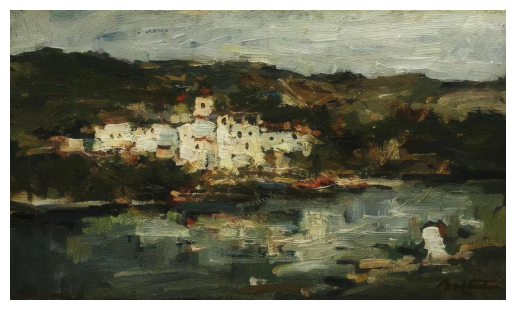

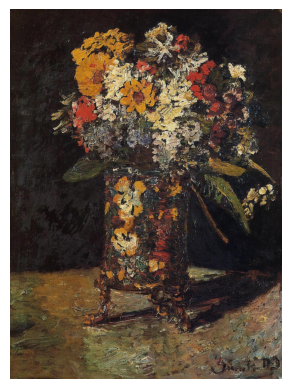

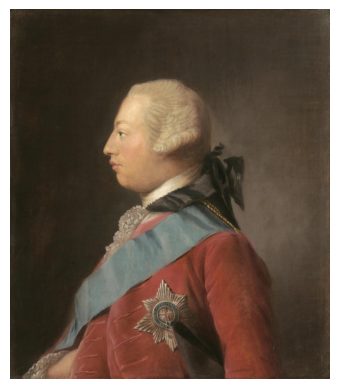

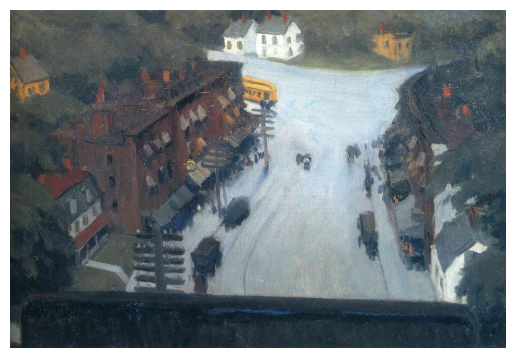

In [67]:
download_folder = "wikiart_images"
full_image_path = os.path.join(download_folder, "adam-baltatu_olt-river-at-cozia.jpg")
img = Image.open(full_image_path)
plt.imshow(img)
plt.axis("off")  # Hide axis
plt.show()
download_folder = "wikiart_images"
full_image_path = os.path.join(download_folder, "adolphe-joseph-thomas-monticelli_bouquet-of-flowers.jpg")
img2 = Image.open(full_image_path)
plt.imshow(img2)
plt.axis("off")  # Hide axis
plt.show()
download_folder = "wikiart_images"
full_image_path = os.path.join(download_folder, "allan-ramsay_portrait-of-king-george-iii.jpg")
img3 = Image.open(full_image_path)
plt.imshow(img3)
plt.axis("off")  # Hide axis
plt.show()
download_folder = "wikiart_images"
full_image_path = os.path.join(download_folder, "edward-hopper_american-village.jpg")
img4 = Image.open(full_image_path)
plt.imshow(img4)
plt.axis("off")  # Hide axis
plt.show()

In [39]:
# Get width and height
width, height = img.size
print(f"Width: {width}, Height: {height}")

Width: 2361, Height: 1382


In [40]:
# Resize images
# 1. constantes
width = 1000
height = 500
def resize_image(image): ##, width, height
    return cv.resize(image, (width, height))

In [41]:
imagen_modificada_tamano = resize_image(cv.imread(full_image_path))

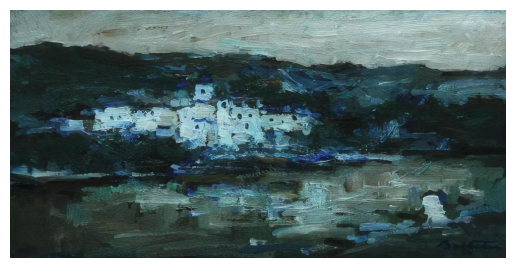

In [42]:
plt.imshow(imagen_modificada_tamano) ##cv.resize(io.imread(full_image_path), (800,800))
plt.axis("off")  # Hide axis
plt.show()

####  Advertencia
Al cambiar de tamaño las imágenes pierden el color.  
TODO 1: generar paleta de colores con las dimensiones originales de la imagen.

## 2. Carga de datos

In [55]:
#commit desde Colab GL test
def load_images(root_path, file_names, flatten=True, normalize=True, target_size=(150, 150)): # Added target_size
    image_list = list()
    for file in file_names:
        # Check if file is an image
        if not file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
            print(f"Skipping non-image file: {file}")
            continue  # Skip to next file

        img_path = os.path.join(root_path, file)
        img = cv.imread(img_path)

        # Handle case where image is not read
        if img is None:
            print(f"Failed to read image: {img_path}")
            continue  # Skip to next file

        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        # Resize image to target_size
        img = cv.resize(img, target_size) # Resizing before appending

        if flatten:
            img = img.reshape((-1, 3))
        if normalize:
            img = img / 255.0
        image_list.append(img)
    return image_list

In [56]:
root_path = "wikiart_images"
file_names = os.listdir(root_path)

In [68]:
img_mod = load_images(root_path, file_names, flatten=True, normalize=True)
#img_mod = ([img.flatten() for img in img_mod])
img_mod[0]

array([[0.4       , 0.40784314, 0.30980392],
       [0.39215686, 0.4       , 0.31764706],
       [0.48627451, 0.49411765, 0.4       ],
       ...,
       [0.15686275, 0.16470588, 0.11372549],
       [0.1372549 , 0.14117647, 0.10980392],
       [0.14901961, 0.15294118, 0.12156863]])

## 3. "Segmentación de imágenes" ()

In [58]:
def silhouette_plot(X, model, k_min=2, k_max=10):
    scores = []
    for i in range(k_min, k_max+1):
        if model == "kmeans":
            model_k = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
        else:
            model_k = KMedoids(n_clusters=i, max_iter=300, random_state=0)
        # Entrenamos el modelo
        model_k.fit(X)
        # Almacenamos el coeficiente de la silueta
        score = silhouette_score(X, model_k.labels_)
        scores.append(score)

    # Graficamos los valores del coeficiente de la silueta
    plt.plot(range(k_min,k_max+1), scores, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()

In [ ]:
plt.title("Primer imagen")
silhouette_plot(img_mod[0], "kmeans", k_min=2, k_max=10)
silhouette_plot(img_mod[1], "kmeans", k_min=2, k_max=10)
silhouette_plot(img_mod[2], "kmeans", k_min=2, k_max=10)
silhouette_plot(img_mod[3], "kmeans", k_min=2, k_max=10)

## n. otros

## Conclusiones